# Experiments on Venmo data

In [1]:
from MNLogit_bfgs_torch import MNLogit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, time

In [2]:
from IPython.display import clear_output
%matplotlib inline

In [3]:
PATH = './'
stratified_filenames = sorted([PATH + x for x in os.listdir(PATH) if '1334' in x and '--1--1' not in x], key=lambda x: int(x.split('-')[-3]))

In [4]:
stratified_filenames

['./1334167200-1342828800-31536000-1.0000-6-2-2',
 './1334167200-1342828800-31536000-1.0000-9-3-3',
 './1334167200-1342828800-31536000-1.0000-12-4-4',
 './1334167200-1342828800-31536000-1.0000-18-6-6',
 './1334167200-1342828800-31536000-1.0000-24-8-8',
 './1334167200-1342828800-31536000-1.0000-36-12-12',
 './1334167200-1342828800-31536000-1.0000-48-16-16',
 './1334167200-1342828800-31536000-1.0000-72-24-24',
 './1334167200-1342828800-31536000-1.0000-96-32-32']

In [5]:
def fit_filename(s):
  print("Processing " + s)
  num_neg = int(s.split('-')[-3])
  train = pd.read_csv(s, header=None, sep=',').values[:,5:].reshape(-1, num_neg+1, 8)
  sws = -np.log(train[:,:,0] / train[:,:,1])
  Xs = train[:,:,[2,3,5,6,7]]
  del train
  ys = np.zeros(Xs.shape[0], dtype=int)
  Xs = np.concatenate([np.log(Xs + (Xs==0)), 1*(Xs>0)], axis=2)
  m = MNLogit(num_threads=64)
  m.data(Xs, ys, sws=sws)
  del Xs, ys, sws

  def show(model, info):
    print("Iter {} - {:.1f}s, ET: {:.1f}s, Avg Loss: {:.6f}, |H\\dw|: {:.6f}, Avg |dw| {:.6f}"\
        .format(info['num_iter'], info['iter_time'], info['total_time'], info['avg_loss'], info['inc_norm'], info['avg_grad_norm']))

  m.fit(max_num_iter=300)
  print("Done with " + s)
  return m.get_model_info()

In [6]:
from multiprocessing import Pool
with Pool(9) as p:
  stratified_results = p.map(fit_filename, stratified_filenames)

Processing ./1334167200-1342828800-31536000-1.0000-6-2-2
Processing ./1334167200-1342828800-31536000-1.0000-12-4-4
Processing ./1334167200-1342828800-31536000-1.0000-9-3-3
Processing ./1334167200-1342828800-31536000-1.0000-18-6-6
Processing ./1334167200-1342828800-31536000-1.0000-36-12-12
Processing ./1334167200-1342828800-31536000-1.0000-48-16-16
Processing ./1334167200-1342828800-31536000-1.0000-24-8-8
Processing ./1334167200-1342828800-31536000-1.0000-72-24-24
Processing ./1334167200-1342828800-31536000-1.0000-96-32-32
Done with ./1334167200-1342828800-31536000-1.0000-24-8-8
Done with ./1334167200-1342828800-31536000-1.0000-9-3-3
Done with ./1334167200-1342828800-31536000-1.0000-12-4-4
Done with ./1334167200-1342828800-31536000-1.0000-18-6-6
Done with ./1334167200-1342828800-31536000-1.0000-36-12-12
Done with ./1334167200-1342828800-31536000-1.0000-6-2-2
Done with ./1334167200-1342828800-31536000-1.0000-48-16-16
Done with ./1334167200-1342828800-31536000-1.0000-72-24-24
Done with ./

In [7]:
num_negs = sorted([int(s.split('-')[-3]) for s in stratified_filenames])

In [8]:
#col_names = ["In TXNs","Out TXNs","Unique Friends","Payer to Candidate",
#             "Candidate to Payer","Friends paid Candidate"]
col_names = ["In TXNs","Out TXNs", "Payer to Candidate",
             "Candidate to Payer","Friends paid Candidate"]
#col_names = ["In TXNs","Payer to Candidate","Friends paid Candidate"]
#col_names = ["In TXNs"]

In [9]:
weights = np.array([sr['weights'] for sr in stratified_results]).T
ses = np.array([sr['se'] for sr in stratified_results]).T

Text(0.5,1,'Stratified, coefficient')

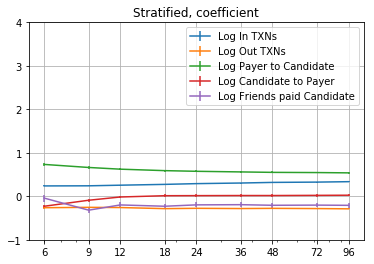

In [10]:
for i in range(5):
  plt.errorbar(x=num_negs, y=weights[i], yerr=ses[i], label='Log ' + col_names[i])

plt.xscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.xticks(ticks, ticks)
plt.ylim(-1,4)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, coefficient')

Text(0.5,1,'Stratified, coefficient')

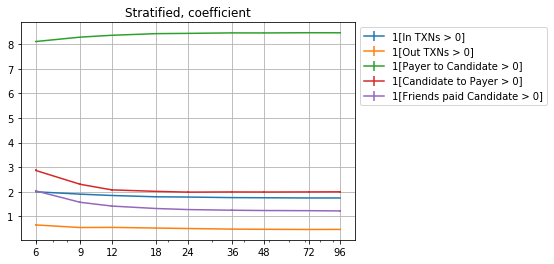

In [12]:
for i in range(5,10):
  plt.errorbar(x=num_negs, y=weights[i], yerr=ses[i], label='1[' + col_names[i%5] + ' > 0]')

plt.xscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.xticks(ticks, ticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, coefficient')

Text(0.5,1,'Stratified, S.E.')

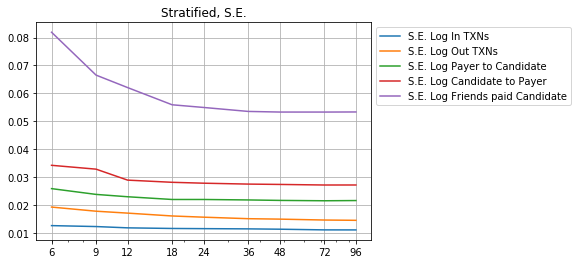

In [13]:
for i in range(5):
  plt.plot(num_negs, ses[i], label='S.E. Log ' + col_names[i%6])

plt.xscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.xticks(ticks, ticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, S.E.')

Text(0.5,1,'Stratified, S.E.')

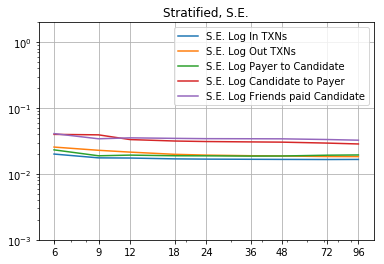

In [14]:
for i in range(5,10):
  plt.plot(num_negs, ses[i], label='S.E. Log ' + col_names[i%5])

plt.xscale('log')
plt.yscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.ylim(0.001,2)
plt.xticks(ticks, ticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, S.E.')

In [ ]:
for i in range(1,2):
  plt.plot(num_negs, ses[i], label='S.E. 1[' + col_names[i%1] + ' > 0]')

plt.xscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.xticks(ticks, ticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, S.E.')

In [ ]:
for i in range(3,6):
  plt.plot(num_negs, ses[i], label='S.E. Log ' + col_names[i%6])

plt.xscale('log')
plt.yscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.ylim(0.001,2)
plt.xticks(ticks, ticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, S.E.')

__Note__

Feature 2 : In-degree (number of transactions in)

Feature 3 : Out-degree (number of transactions out)

Feature 4 : Number of unique friends

Feature 5 : Payer-to-candidates transactions count

Feature 6 : Candidates-to-payer transactions count

Feature 7 : Number of payer's friend that paid each candidate

__Note 2__ Before running the experiments, ensure that there are at least one positive example and one negative example in every bin.

In [ ]:
feature = 2
num_bins = 50

In [ ]:
count, _, _ = plt.hist(train[:,0,feature], bins=np.concatenate([np.arange(-0.5,num_bins+.5, 1)]))
plt.yscale('log')
print("Smallest bin size: {}".format(min(count)))
print("Data used: {}%".format(100 * sum(count) / train.shape[0]))

In [ ]:
count, _, _ = plt.hist(train[:,1:,feature].reshape(-1), bins=np.arange(-0.5, num_bins+.5, 1))
plt.yscale('log')
print("Smallest bin size: {}".format(min(count)))
print("Data used: {}%".format(100 * sum(count) / train.shape[0] / (train.shape[1] - 1)))

### 4a. Preprocess the data and implement the plot function

In [ ]:
def onehot(x, cap=50):
  ncols = min(cap+1, x.max()+1)
  a = np.minimum(x, cap)
  out = np.zeros( (a.size,ncols), dtype=np.float)
  out[np.arange(a.size),a.ravel()] = 1
  out.shape = a.shape + (ncols,)
  return out[...,:-1]

In [ ]:
from scipy.stats import linregress

def plot_weight(m, info, feature_name='<feature_name>'):
  clear_output(wait=True)
  plt.figure(figsize=(7,5))
  plot_range = np.arange(0,50).astype(float)
  plot_range[0] = 0.5
  lr = linregress(np.log(np.arange(1,20)), m.w.numpy()[1:20])
  plt.plot(plot_range, lr.slope * np.log(plot_range) + lr.intercept, 'r-', linewidth=0.9, label="slope = {:.4f}".format(lr.slope))
  plt.plot(plot_range, m.w.numpy(), 'kx')
  plt.errorbar(x=plot_range, y=m.w.numpy(), yerr=0 if info['se'] is None else info['se'], color='k', ls='none')
  plt.xscale('log')
  plt.title("Relative coefficients for each bin (by the {})".format(feature_name))
  plt.xlabel(feature_name)
  plt.xlim(0.4,60)
  # plt.ylim(-4.5,0.5)
  ticks = [1,2,3,4,5,6,8,10,15,20,30,40,50]
  plt.xticks([0.5]+ticks, [0]+ticks)
  plt.grid()
  plt.legend()
  print("Iter {} - {:.1f}s, ET: {:.1f}s, Avg Loss: {:.6f}, |H\\dw|: {:.6f}, Avg |dw| {:.6f}"\
        .format(info['num_iter'], info['iter_time'], info['total_time'], info['avg_loss'], info['inc_norm'], info['avg_grad_norm']))

  plt.show();

### 4b. Fit the 6 single-feature models (50 bins)

In [ ]:
Xs_onehot = onehot(train[:,:,2], cap=50)
m = MNLogit()
m.data(Xs_onehot, ys, sws=sws)
m.fit(max_num_iter=500, verbose_function=lambda x,y: plot_weight(x,y,feature_name='Number of In-transactions'))

In [ ]:
m.eval(Xs_onehot, ys)

In [ ]:
Xs_onehot = onehot(train[:,:,3], cap=50)
m = MNLogit()
m.data(Xs_onehot, ys, sws=sws)
m.fit(max_num_iter=500, verbose_function=lambda x,y: plot_weight(x,y,feature_name='Number of Out-transactions'))

In [ ]:
m.eval(Xs_onehot, ys)

In [ ]:
Xs_onehot = onehot(train[:,:,4], cap=50)
m = MNLogit()
m.data(Xs_onehot, ys, sws=sws)
m.fit(max_num_iter=500, verbose_function=lambda x,y: plot_weight(x,y,feature_name='Number of unique friends'))

In [ ]:
m.eval(Xs_onehot, ys)

In [ ]:
Xs_onehot = onehot(train[:,:,5], cap=50)
m = MNLogit()
m.data(Xs_onehot, ys, sws=sws)
m.fit(max_num_iter=500, verbose_function=lambda x,y: plot_weight(x,y,feature_name='Number of prev. txns, Payer to Candidate'))

In [ ]:
m.eval(Xs_onehot, ys)

In [ ]:
Xs_onehot = onehot(train[:,:,6], cap=50)
m = MNLogit()
m.data(Xs_onehot, ys, sws=sws)
m.fit(max_num_iter=500, verbose_function=lambda x,y: plot_weight(x,y,feature_name='Number of prev. transactions, Candidate to Payer'))

In [ ]:
m.eval(Xs_onehot, ys)

In [ ]:
Xs_onehot = onehot(train[:,:,7], cap=50)
m = MNLogit()
m.data(Xs_onehot, ys, sws=sws)
m.fit(max_num_iter=500, verbose_function=lambda x,y: plot_weight(x,y,feature_name='Number of unique friends who have paid the candidate'))

In [ ]:
m.eval(Xs_onehot, ys)

### 4c. Fitting all 6 features simultaneously (= 300 columns)

In [ ]:
Xs_onehot = np.concatenate([onehot(train[:,:,2], cap=50), onehot(train[:,:,3], cap=50),
                            onehot(train[:,:,4], cap=50), onehot(train[:,:,5], cap=50),
                            onehot(train[:,:,6], cap=50), onehot(train[:,:,7], cap=50)], axis=2).astype(float)

In [ ]:
def plot_weight6(m, info):
  clear_output(wait=True)
  plt.figure(figsize=(7,5))
  labels = ['InDeg', 'OutDeg', 'UniqFriends', 'Payer2Candidate', 'Candidate2Payer','UniqFriendsPaidCandidate']
  plot_range = np.arange(0,50).astype(float)
  plot_range[0] = 0.5
  for i in range(6):
    plt.errorbar(x=plot_range,\
                 y=m.w.numpy()[50*i:50*i+50],\
                 yerr=0 if info['se'] is None else info['se'][50*i:50*i+50],
                 label=labels[i])
  plt.xscale('log')
  plt.title("Relative coefficients for each bin")
  plt.xlabel("Feature value")
  plt.xlim(0.4,60)
  plt.ylim(-4.2,1.2)
  ticks = [1,2,3,4,5,6,8,10,15,20,30,40,50]
  plt.xticks([0.5] + ticks, [0] + ticks)
  plt.grid()
  plt.legend()
  print("Iter {} - {:.1f}s, ET: {:.1f}s, Avg Loss: {:.6f}, |H\\dw|: {:.6f}, Avg |dw| {:.6f}"\
        .format(info['num_iter'], info['iter_time'], info['total_time'], info['avg_loss'], info['inc_norm'], info['avg_grad_norm']))

  plt.show();

In [ ]:
m = MNLogit()
m.data(Xs_onehot, ys, sws=sws)
m.fit(max_num_iter=500, verbose_function=plot_weight6)

In [ ]:
from scipy.stats import linregress
linregress(np.log(np.arange(1,50)), m.w.numpy()[151:200])

In [ ]:
m.eval(Xs_onehot, ys)

In [ ]:
del Xs_onehot
del m

### Note on results
As discussed before, 5 out of 6 single-feature non-parametric model very strongly suggest the given function form (linear on log and zero indicator). However, when we fit the non-parametric models for different feature simultaneously (by concatenating columns), we can see that there are just one feature that actually is linear with $\log (x)$, the `Payer-to-candidate transaction count`.

### 4d. Joint non-parametric model

We want to see if the features have direct interactions with one another. In this experiment, we consider two features (`Payer-to-candidate transaction count` and `Number of unique friends who paid the candidate` (i.e. "mutual friends")). We put the candidates into 20x20 (=400) bins and fit a non-parametric model with 400 parameters to see the joint function form of the parameters.

In [ ]:
def flatten_nonparametric(n1, n2, num_bins):
  counted = np.logical_and(n1 < num_bins, n2 < num_bins)
  return n1*counted*num_bins + n2*counted + num_bins*num_bins*(1-counted)

#### Ensure non-zero bin sizes

In [ ]:
count, _, _ = plt.hist(flatten_nonparametric(train[:,0,5], train[:,0,7], 20), bins=np.concatenate([np.arange(-0.5,401+.5, 1)]))
plt.yscale('log')
print("Smallest bin size: {}".format(min(count)))
print("Data used: {:.2f}%".format(100 * sum(count[:-1]) / train.shape[0]))

In [ ]:
count, _, _ = plt.hist(flatten_nonparametric(train[:,1:,5], train[:,1:,7], 20).reshape(-1), bins=np.concatenate([np.arange(-0.5,401+.5, 1)]))
plt.yscale('log')
print("Smallest bin size: {}".format(min(count)))
print("Data used: {:.2f}%".format(100 * sum(count[:-1]) / train.shape[0] / (train.shape[1] - 1)))

In [ ]:
Xs_onehot = onehot(flatten_nonparametric(train[:,:,5], train[:,:,7], 20), cap=400)

In [ ]:
m = MNLogit()
m.data(Xs_onehot, ys, sws=sws)
m.fit(max_num_iter=500, verbose_function=show)

In [ ]:
m.eval(Xs_onehot, ys)

In [ ]:
m = m.get_model_info()
m['weights'].shape = (20,20)

In [ ]:
del Xs_onehot

### 4e. Plot the 400 weights
__I.__ 20 lines plot, each line for different `Numbers of friends who have paid the candidate` 
  * __x-axis__ is `Number of previous transactions (Payer ==> candidates)`

__II.__ ^ x log scale, excludes 0

__III.__ 20 lines plot, each line for different `Number of previous transactions (Payer ==> candidates)`
  * __x-axis__ is `Number of friends who have paid the candidate`

__IV.__ ^ zoomed in for the upper part

__V.__ ^ x log scale, excludes 0

__VI.__ Contour plot where color = coefficient 
  * __x-axis__ is `Number of friends who have paid the candidate`
  * __y-axis__ is `Number of previous transactions (Payer ==> candidates)`, both exclude 0.

__VII.__ y log scale

__VIII.__ ^ log-log

In [ ]:
for i in range(20):
  colorcode = hex(256 * (256 * (255 * i // 20) + (170 * i // 20)))[2:]
  colorcode = '0'*(6-len(colorcode)) + colorcode
  plt.plot(m['weights'][:,i],\
           color='#{}'.format(colorcode), linewidth=1)
plt.xticks(range(20),range(20))
plt.grid()
plt.xlabel("Number of previous transactions (Payer ==> candidates)")

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
  colorcode = hex(256 * (256 * (255 * i // 20) + (170 * i // 20)))[2:]
  colorcode = '0'*(6-len(colorcode)) + colorcode
  plt.plot(m['weights'][:,i],\
           color='#{}'.format(colorcode))
plt.xscale('log')
plt.ylim(-4,0.5)
plt.xticks(range(1,20),range(1,20))
plt.grid()
plt.xlabel("Number of previous transactions (Payer ==> candidates)")

In [ ]:
for i in range(20):
  colorcode = hex(256 * (256 * (255 * i // 20) + (170 * i // 20)))[2:]
  colorcode = '0'*(6-len(colorcode)) + colorcode
  plt.plot(m['weights'][i,:],\
           color='#{}'.format(colorcode), linewidth=1)
plt.xticks(range(20),range(20))
plt.grid()
plt.xlabel("Number of friends who have paid the candidate")

In [ ]:
plt.figure(figsize=(6,12))
for i in range(20):
  colorcode = hex(256 * (256 * (255 * i // 20) + (170 * i // 20)))[2:]
  colorcode = '0'*(6-len(colorcode)) + colorcode
  plt.plot(m['weights'][i,:],\
           color='#{}'.format(colorcode))
plt.ylim(-4,0.5)
plt.xticks(range(1,20),range(1,20))
plt.grid()
plt.xlabel("Number of friends who have paid the candidate")

In [ ]:
plt.figure(figsize=(8,8))
for i in range(20):
  colorcode = hex(256 * (256 * (255 * i // 20) + (170 * i // 20)))[2:]
  colorcode = '0'*(6-len(colorcode)) + colorcode
  plt.plot(m['weights'][i,:],\
           color='#{}'.format(colorcode))
plt.xscale('log')
plt.ylim(-4,0.5)
plt.xticks(range(1,20),range(1,20))
plt.grid()
plt.xlabel("Number of friends who have paid the candidate")

In [ ]:
plt.figure(figsize=(8,8))
plt.contourf(m['weights'][1:,1:], levels=np.arange(-4,0.8,0.2))
plt.ylim(1,19)
plt.xlabel("Number of friends who have paid the candidate")
plt.ylabel("Number of previous transactions (Payer ==> candidates)")
plt.yticks(range(1,20), range(1,20))

In [ ]:
plt.figure(figsize=(8,8))
plt.contourf(m['weights'][1:,1:], levels=np.arange(-4,0.8,0.2))
plt.yscale('log')
plt.ylim(1,19)
plt.xlabel("Number of friends who have paid the candidate")
plt.ylabel("Number of previous transactions (Payer ==> candidates)")
plt.yticks(range(1,20), range(1,20))

In [ ]:
plt.figure(figsize=(8,8))
plt.contourf(m['weights'][1:,1:], levels=np.arange(-4,0.8,0.2))
plt.xlim(1,19)
plt.ylim(1,19)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of friends who have paid the candidate")
plt.ylabel("Number of previous transactions (Payer ==> candidates)")
plt.xticks(range(1,20), range(1,20))
plt.yticks(range(1,20), range(1,20))